In [49]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
# Load DataFrame and Create Instance
insurance = pd.read_csv("insurance.csv")
df = insurance.copy()

In [51]:
# Print data (first 5 rows)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [52]:
# Check the df for null values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [53]:
# Check the df for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [54]:
# Print data statistics
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# **3.Exploratory Data Analysis**

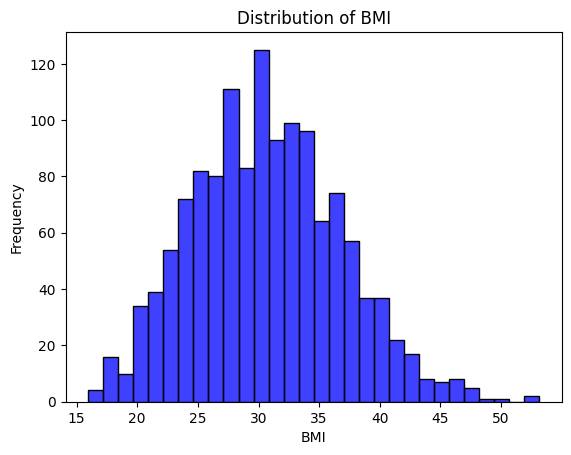

In [55]:
# Examine the distribution of Bmi (Body Mass Index)
sns.histplot(df['bmi'], color='blue', bins=30)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

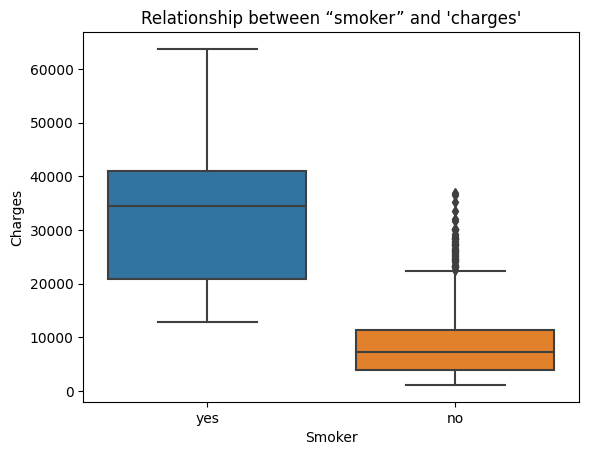

In [56]:
# Examine the relationship between “smoker” and “charges”
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Relationship between “smoker” and 'charges'")
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

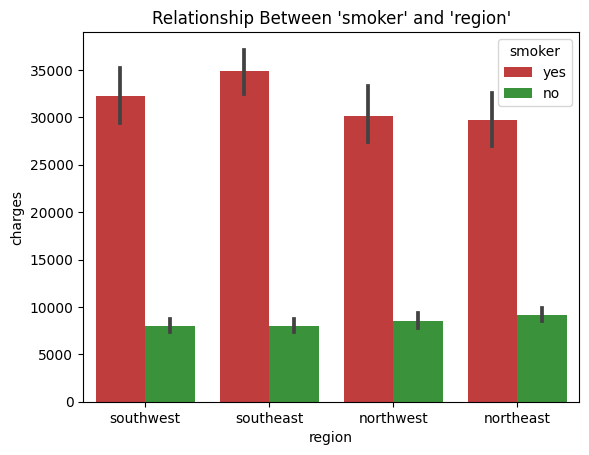

In [57]:
# Examine the relationship between “smoker” and “region”
sns.barplot(x='region', y='charges', hue='smoker', data=df, palette=['tab:red','tab:green'])
plt.title("Relationship Between 'smoker' and 'region'")
plt.xlabel('region')
plt.ylabel('charges')
plt.show()

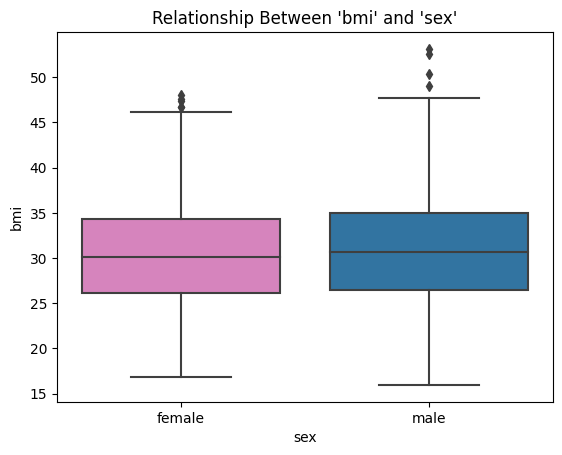

In [58]:
# Examine the relationship between “bmi” and “sex”
sns.boxplot(x='sex', y='bmi', data=df, palette=['tab:pink','tab:blue'])
plt.title("Relationship Between 'bmi' and 'sex'")
plt.xlabel('sex')
plt.ylabel('bmi')
plt.show()

In [59]:
# Find the "region" with the most "children"
sum_children = df.groupby("region")["children"].sum()
most_region = sum_children.idxmax()
number_of_most = sum_children[most_region]
print(f"Region with the most children is {most_region}, number of the children is {number_of_most}.")

Region with the most children is southeast, number of the children is 382.


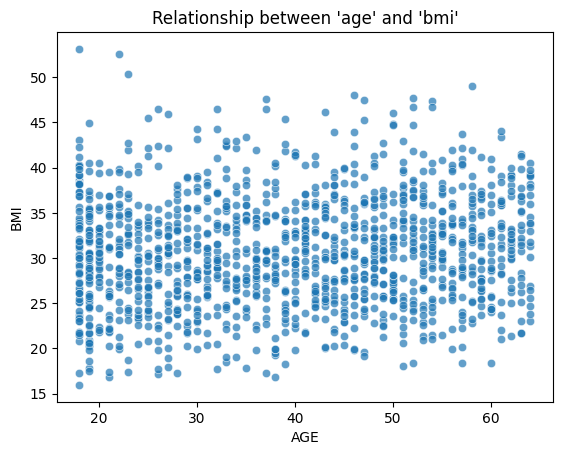

In [63]:
# Examine the relationship between “age” and “bmi”
sns.scatterplot(data=df, x='age', y='bmi', alpha=0.7)
plt.title("Relationship between 'age' and 'bmi'")
plt.xlabel('AGE')
plt.ylabel('BMI')
plt.show()

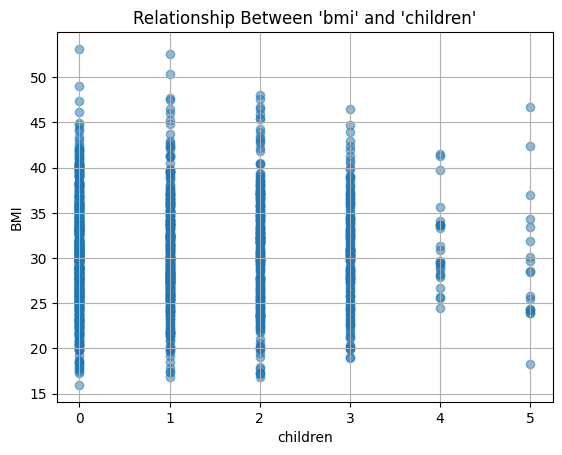

In [65]:
# Examine the relationship between “bmi” and “children”
plt.scatter(df["children"], df["bmi"], alpha=0.5)
plt.title("Relationship Between 'bmi' and 'children'")
plt.xlabel("children")
plt.ylabel("BMI")
plt.grid(True)
plt.show()

***Is there an outlier in the "bmi" variable? Please review.***

    -As we have seen above, there is no meaningful correlation between 'bmi' and 'children' values.




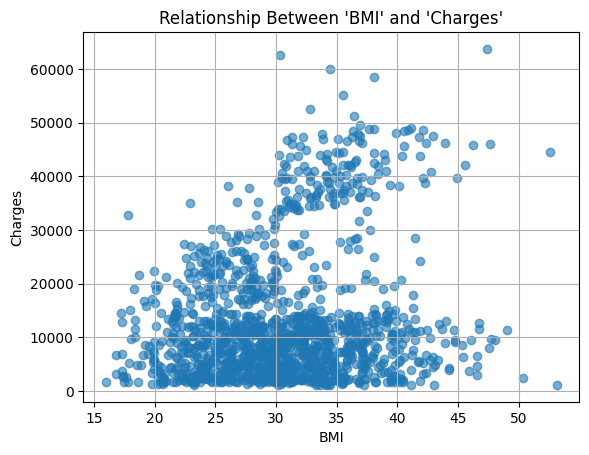

In [66]:
# Examine the relationship between “bmi” and “charges”
plt.scatter(df["bmi"], df["charges"], alpha=0.6)
plt.title("Relationship Between 'BMI' and 'Charges'")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.grid(True)
plt.show()

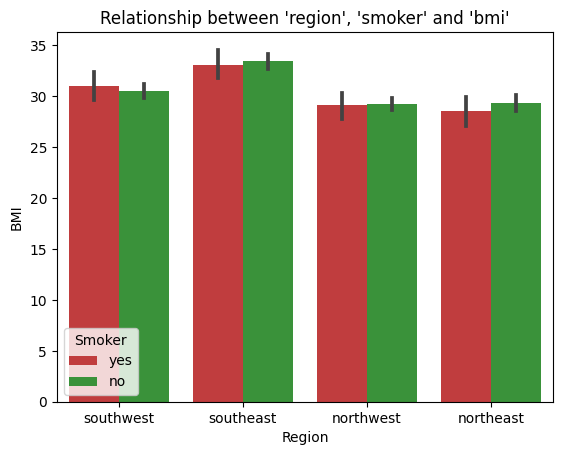

In [67]:
# Examine the relationship between “region”, “smoker” and “bmi” using bar plot.
sns.barplot(x="region", y="bmi", hue="smoker",palette=['tab:red','tab:green'], data=df)
plt.title("Relationship between 'region', 'smoker' and 'bmi'")
plt.xlabel("Region")
plt.ylabel("BMI")
plt.legend(title="Smoker")
plt.show()

# **4. Data Preprocessing**